## This is going to be the start of my privacy preserving federated learning on noisy link project

* First I will start by import the data.
* Then explore the data and try to clean it
* Add the appropriate labels to it.
* save the clean data as a csv file.


## IMPORT THE DATA
I need to add my libraries first.
Libraries like, Pandas,NumPy and probably matplotlib if i want to visualize the data.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## WISDM DATASET
The data used here is the **WISDM(Wireless Sensor Data Mining)** dataset which has been released by the Wireless Sensor Data Mining
(WISDM) Lab. <http://www.cis.fordham.edu/wisdm/>

The data in this file corresponds with the data used in the
following paper:

Jennifer R. Kwapisz, Gary M. Weiss and Samuel A. Moore (2010). 
Activity Recognition using Cell Phone Accelerometers, 
Proceedings of the Fourth International Workshop on Knowledge 
Discovery from Sensor Data (at KDD-10), Washington DC. 
<http://www.cis.fordham.edu/wisdm/public_files/sensorKDD-2010.pdf>

> Other relevant articles, which can be found here:<http://www.cis.fordham.edu/wisdm/publications.php>

- Jeffrey W. Lockhart, Tony Pulickal, and Gary M. Weiss (2012). 
	"Applications of Mobile Activity Recognition," 
	Proceedings of the ACM UbiComp International Workshop 
	on Situation, Activity, and Goal Awareness, Pittsburgh, 
	PA.

- Gary M. Weiss and Jeffrey W. Lockhart (2012). "The Impact of 
	Personalization on Smartphone-Based Activity Recognition," 
	Proceedings of the AAAI-12 Workshop on Activity Context 
	Representation: Techniques and Languages, Toronto, CA.

- Jennifer R. Kwapisz, Gary M. Weiss and Samuel A. Moore (2010). 
	"Activity Recognition using Cell Phone Accelerometers," 
	Proceedings of the Fourth International Workshop on 
	Knowledge Discovery from Sensor Data (at KDD-10), Washington 
	DC. 

**INFO ON DATASET**
- Associated tasks - classification
- Number of examples: 1,098,207
- Number of attributes: 6
- Missing attribute values: None
- Class distribution: {
	* Walking -> 424,400 -> 38.6%,
	* Jogging -> 342,177 -> 31.2%,
	* Upstairs -> 122,869 -> 11.2%,
	* Downstairs -> 100,427 -> 9.1%,
	* Sitting -> 59,939 -> 5.5%,
	* Standing -> 48,395 -> 4.4% }

> raw.txt follows this format:<br>
> [user],[activity],[timestamp],[x-acceleration],[y-accel],[z-accel];

This line is a representative example:
>33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;

- Sampling rate: 
20Hz (1 sample every 50ms)

Fields:
* user
	nominal, 1..36

* activity
	nominal, {<br>
		Walking<br>
		Jogging<br>
		Sitting<br>
		Standing<br>
		Upstairs<br>
		Downstairs<br> }

* timestamp
	numeric, generally the phone's uptime in nanoseconds
		(In future datasets this will be miliseconds
		since unix epoch.)

* x-acceleration
	numeric, floating-point values between -20 .. 20
		The acceleration in the x direction as measured
		by the android phone's accelerometer. 
		A value of 10 = 1g = 9.81 m/s^2, and
		0 = no acceleration.
		The acceleration recorded includes gravitational
		acceleration toward the center of the Earth, so
		that when the phone is at rest on a flat surface
		the vertical axis will register +-10. 

* y-accel
	numeric, see x-acceleration

* z-accel
        numeric, see x-acceleration


> NB: The information on the data can be found in the readme.txt in the WISDM file.


In [6]:
df = pd.read_csv(
    r"C:\Users\THIS PC\flwr_wisdm\WISDM_ar_v1.1_raw.txt",
    delimiter=",",
    header=None,
    names=["user", "activity", "timestamp", "x", "y", "z"],# added the appropriate labels
    engine="python",

)

ParserError: Expected 6 fields in line 134640, saw 11

> the error message shown here tells us that there are some row that pandas cannot really import.<br> In that case we'll need to skip some rows.

In [3]:
df = pd.read_csv(
    r"C:\Users\THIS PC\flwr_wisdm\WISDM_ar_v1.1_raw.txt",
    delimiter=",",
    header=None,
    names=["user", "activity", "timestamp", "x", "y", "z"],# added the appropriate labels
    engine="python",
    on_bad_lines="skip"
)

df.head(10) # this is to show the first 10 rows of the dataset

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526;
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926;
7,33,Jogging,49106652389000,-0.503953,13.947236,7.0553403;
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871;
9,33,Jogging,49106872299000,0.953424,1.375655,1.6480621;


In [4]:
df.shape

(1086466, 6)

In [29]:
df.info() # this is to show the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086466 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086466 non-null  int64  
 1   activity   1086466 non-null  object 
 2   timestamp  1086466 non-null  int64  
 3   x          1086466 non-null  float64
 4   y          1086466 non-null  float64
 5   z          1086465 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 49.7+ MB


> The dataset has now been imported and these are the analysis.<br>
So the original dataset had **1,098,207** but now with the skipped rows, the dataset reduces to **1086466**<br> Another thing observed is that the Z columns' datatype is an **object** instead of **float** like X and Y

In [5]:
df["activity"].value_counts()

activity
Walking       418394
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: count, dtype: int64

Comparing the original and the imported data
- Activity:
	* Walking -> 424,400
	* Jogging -> 342,177
	* Upstairs -> 122,869
	* Downstairs -> 100,427
	* Sitting -> 59,939
	* Standing -> 48,395

It clearly shows a reduction in the number of rows

<Axes: xlabel='activity'>

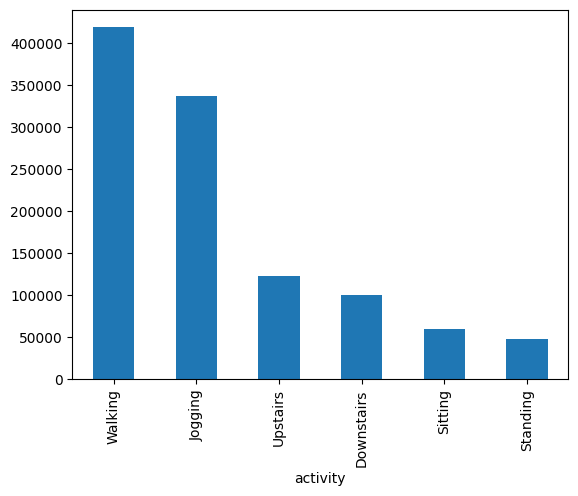

In [6]:
df["activity"].value_counts().plot(kind="bar")


In [7]:
df.isna().sum()

user         0
activity     0
timestamp    0
x            0
y            0
z            1
dtype: int64

> Z has one missing value

In [8]:
df = df.dropna() # dropping the missing values
df.isna().sum()

user         0
activity     0
timestamp    0
x            0
y            0
z            0
dtype: int64

In [9]:
df.shape


(1086465, 6)

In [10]:
df.head()

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [11]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086465 non-null  int64  
 1   activity   1086465 non-null  object 
 2   timestamp  1086465 non-null  int64  
 3   x          1086465 non-null  float64
 4   y          1086465 non-null  float64
 5   z          1086465 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ MB


(None, (1086465, 6))

In [12]:
df = df.dropna()
df.isna().sum()

user         0
activity     0
timestamp    0
x            0
y            0
z            0
dtype: int64

In [13]:
# Remove semicolons and whitespace
df["z"] = df["z"].str.replace(";", "", regex=False).str.strip()

# Now convert to float
df["z"] = df["z"].astype(float)


In [14]:
df.head()

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


> Data clean in is all done ✅

## SAVE DATA

In [15]:
df.to_csv("cleaned_wisdm_data.csv", index=False)

In [19]:
# ==========================================
# HUMAN ACTIVITY RECOGNITION MODEL (WISDM)
# ==========================================

import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# 1. Load and clean dataset
# -----------------------------
df = pd.read_csv("cleaned_wisdm_data.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(';', '', regex=False)

# Drop missing values
df.dropna(inplace=True)

# Keep only necessary columns
expected_cols = ['user', 'activity', 'timestamp', 'x', 'y', 'z']
df = df[[col for col in expected_cols if col in df.columns]]

# Ensure numeric acceleration values
for col in ['x', 'y', 'z']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['x', 'y', 'z'], inplace=True)

# Sort by timestamp (important for sequential data)
df.sort_values(by='timestamp', inplace=True, ignore_index=True)

print(f"📊 Dataset loaded with {len(df)} samples and {df['activity'].nunique()} activities.")

# -----------------------------
# 2. Segment data into windows
# -----------------------------
WINDOW_SIZE = 100  # smaller window to ensure enough samples

segments = []
labels = []

for i in range(0, len(df) - WINDOW_SIZE, WINDOW_SIZE):
    window = df.iloc[i : i + WINDOW_SIZE]
    x = window['x'].values
    y = window['y'].values
    z = window['z'].values

    # Use majority (most frequent) activity label in the window
    activity = window['activity'].mode()[0]

    # Safe correlation function
    def safe_corr(a, b):
        if np.std(a) == 0 or np.std(b) == 0:
            return 0
        return np.corrcoef(a, b)[0, 1]

    # Extract time-domain features
    features = [
        np.mean(x), np.mean(y), np.mean(z),
        np.std(x), np.std(y), np.std(z),
        np.min(x), np.min(y), np.min(z),
        np.max(x), np.max(y), np.max(z),
        np.sqrt(np.var(x) + np.var(y) + np.var(z)),        # signal magnitude std
        np.mean(np.abs(x) + np.abs(y) + np.abs(z)),        # SMA
        entropy(np.abs(x) + 1e-10),                        # avoid log(0)
        entropy(np.abs(y) + 1e-10),
        entropy(np.abs(z) + 1e-10),
        safe_corr(x, y), safe_corr(x, z), safe_corr(y, z)
    ]

    segments.append(features)
    labels.append(activity)

print(f"✅ Created {len(segments)} segments from {len(df)} samples.")

# Convert to DataFrame
columns = [
    'mean_x', 'mean_y', 'mean_z',
    'std_x', 'std_y', 'std_z',
    'min_x', 'min_y', 'min_z',
    'max_x', 'max_y', 'max_z',
    'magnitude_std', 'SMA',
    'entropy_x', 'entropy_y', 'entropy_z',
    'corr_xy', 'corr_xz', 'corr_yz'
]

X = pd.DataFrame(segments, columns=columns)
y = pd.Series(labels, name='activity')

# Check if we have valid data
if len(X) == 0:
    raise ValueError("No segments were created! Try reducing WINDOW_SIZE or check your data.")

# -----------------------------
# 3. Split and train the model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# -----------------------------
# 4. Evaluate the model
# -----------------------------
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Dataset loaded with 1086465 samples and 6 activities.
✅ Created 10864 segments from 1086465 samples.

✅ Accuracy: 0.884

📊 Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.82      0.71      0.76       230
     Jogging       0.91      0.94      0.92       636
     Sitting       0.94      0.91      0.92        98
    Standing       0.98      0.76      0.86        68
    Upstairs       0.86      0.69      0.76       243
     Walking       0.87      0.95      0.91       898

    accuracy                           0.88      2173
   macro avg       0.90      0.83      0.86      2173
weighted avg       0.88      0.88      0.88      2173


🔹 Confusion Matrix:
 [[164   5   1   0  16  44]
 [  9 595   0   1   4  27]
 [  3   4  89   0   1   1]
 [  5   3   1  52   2   5]
 [ 13  16   0   0 167  47]
 [  6  29   4   0   5 854]]
